<a href="https://colab.research.google.com/github/Amine-dd/CNN/blob/master/deepCNNtf1_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [3]:
NUM_CLASSES = 10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 16:37:24 2020

@author: amino
"""

input_layer = Input((32,32,3))
x = Conv2D(filters = 32,kernel_size = 3,strides =1,padding='same') (input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 32,kernel_size = 3,strides =2,padding='same')(x)
x= BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters=64,kernel_size=3,strides=1,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64,kernel_size=3,strides=2,padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)
x =Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer,output_layer)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 32)        0   

In [9]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 196s 4ms/step - loss: 1.6068 - acc: 0.4448 - val_loss: 1.2040 - val_acc: 0.5754
Epoch 2/10
50000/50000 [==============================] - 197s 4ms/step - loss: 1.1573 - acc: 0.5925 - val_loss: 1.1311 - val_acc: 0.6026
Epoch 3/10
50000/50000 [==============================] - 196s 4ms/step - loss: 0.9972 - acc: 0.6519 - val_loss: 0.9873 - val_acc: 0.6479
Epoch 4/10
50000/50000 [==============================] - 197s 4ms/step - loss: 0.9113 - acc: 0.6803 - val_loss: 0.9497 - val_acc: 0.6776
Epoch 5/10
50000/50000 [==============================] - 196s 4ms/step - loss: 0.8428 - acc: 0.7056 - val_loss: 0.8857 - val_acc: 0.6927
Epoch 6/10
50000/50000 [==============================] - 196s 4ms/step - loss: 0.7891 - acc: 0.7222 - val_loss: 0.9010 - val_acc: 0.6981
Epoch 7/10
50000/50000 [==

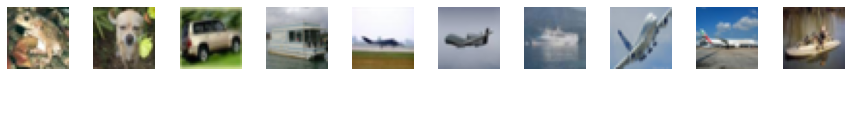

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes,color='white') 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes,color='white')
    ax.imshow(img)

Much better now using convolutions

In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 14s 1ms/step


[0.8230489977836609, 0.7192]